In [1]:

# Here are what the columns represent:

# -> credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
# -> purpose: The purpose of the loan(takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
# -> int.rate: The interest rate of the loan, as a proportion(a rate of 11 % would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
# -> installment: The monthly installments owed by the borrower if the loan is funded.
# -> log.annual.inc: The natural log of the self-reported annual income of the borrower.
# -> dti: The debt-to-income ratio of the borrower(amount of debt divided by annual income).
# -> fico: The FICO credit score of the borrower.
# -> days.with.cr.line: The number of days the borrower has had a credit line.
# -> revol.bal: The borrower's revolving balance(amount unpaid at the end of the credit card billing cycle).
# -> revol.util: The borrower's revolving line utilization rate(the amount of the credit line used relative to total credit available).
# -> inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
# -> delinq.2yrs: The number of times the borrower had been 30 + days past due on a payment in the past 2 years.
# -> pub.rec: The borrower's number of derogatory public records(bankruptcy filings, tax liens, or judgments).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loans = pd.read_csv('Machine Learning Sections\\Decision Trees and Random Forests\\loan_data.csv')


In [2]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

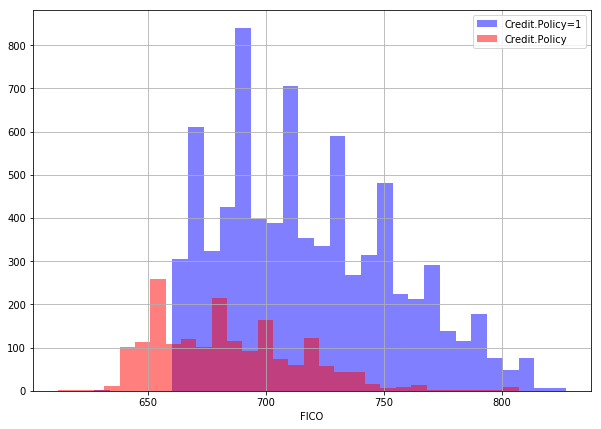

In [4]:
plt.figure(figsize=(10,7))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label="Credit.Policy=1")

loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit.Policy')

plt.legend()
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

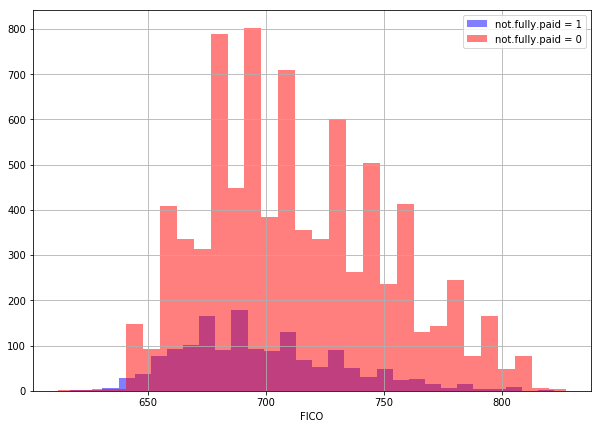

In [6]:
plt.figure(figsize=(10,7))
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label="not.fully.paid = 1")

loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid = 0')

plt.legend()
plt.xlabel("FICO")

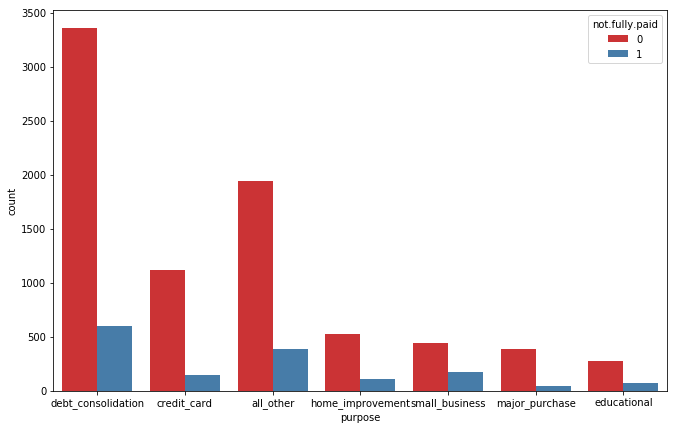

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')


C:\Users\uppup\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


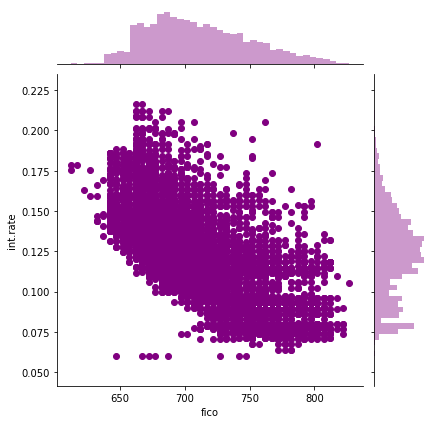

In [8]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

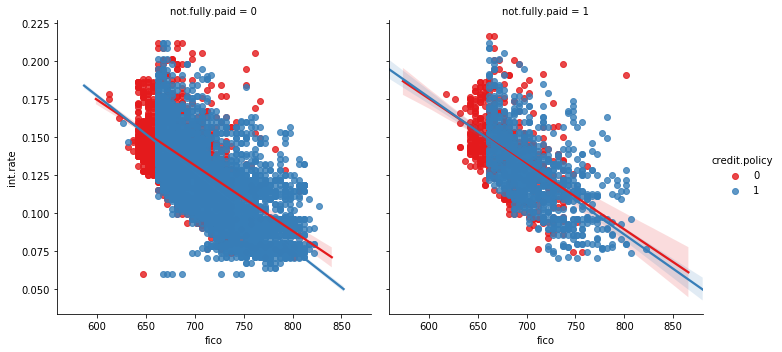

In [9]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set1')

In [10]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
categorical_features = ['purpose']

In [15]:
final_data = pd.get_dummies(loans, columns=categorical_features, drop_first=True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



[[1999  432]
 [ 339  104]]


In [25]:
# Train the random forest model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
predictions = rfc.predict(X_test)

In [0]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))